In [1]:
#libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats

#dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#isolation forest
from sklearn.ensemble import IsolationForest

In [2]:
#set working directory
os.chdir('')

## Data processing

In [3]:
#import and process sheet 1
# suppress pandas warning

# create seperate dataframes for each reporting period, rename columns and merge into panel format

df_gen = pd.read_excel('data/data_for_technical_assessment.xlsx', sheet_name = 'Dataset 1 - General')

df_2016 = df_gen[df_gen.columns[df_gen.iloc[0] == '2016YE']].loc[1:]
df_2016['reporting_period'] = '2016' #should this be an integer?
df_2016 = df_2016.rename(columns = {'NWP (£m) ' : 'nwp',
                          'SCR (£m)' : 'src',
                          'EoF for SCR (£m)' : 'eof_for_src',
                          'SCR coverage ratio' : 'scr_coverage_ratio',
                          'GWP (£m)' : 'gwp',
                          'Total assets (£m)' : 'total_assets',
                          'Total liabilities (£m)' : 'total_liabilities',
                          'Excess of assets over liabilities (£m) [= equity]' : 'equity'})


df_2017 = df_gen[df_gen.columns[df_gen.iloc[0] == '2017YE']].loc[1:]
df_2017['reporting_period'] = '2017'
df_2017 = df_2017.rename(columns = {'NWP (£m) .1' : 'nwp',
                          'SCR (£m).1' : 'src',
                          'EoF for SCR (£m).1' : 'eof_for_src',
                          'SCR coverage ratio.1' : 'scr_coverage_ratio',
                          'GWP (£m).1' : 'gwp',
                          'Total assets (£m).1' : 'total_assets',
                          'Total liabilities (£m).1' : 'total_liabilities',
                          'Excess of assets over liabilities (£m) [= equity].1' : 'equity'})


df_2018 = df_gen[df_gen.columns[df_gen.iloc[0] == '2018YE']].loc[1:]
df_2018['reporting_period'] = '2018'
df_2018 = df_2018.rename(columns = {'NWP (£m) .2' : 'nwp',
                          'SCR (£m).2' : 'src',
                          'EoF for SCR (£m).2' : 'eof_for_src',
                          'SCR coverage ratio.2' : 'scr_coverage_ratio',
                          'GWP (£m).2' : 'gwp',
                          'Total assets (£m).2' : 'total_assets',
                          'Total liabilities (£m).2' : 'total_liabilities',
                          'Excess of assets over liabilities (£m) [= equity].2' : 'equity'})


df_2019 = df_gen[df_gen.columns[df_gen.iloc[0] == '2019YE']].loc[1:]
df_2019['reporting_period'] = '2019'
df_2019 = df_2019.rename(columns = {'NWP (£m) .3' : 'nwp',
                          'SCR (£m).3' : 'src',
                          'EoF for SCR (£m).3' : 'eof_for_src',
                          'SCR coverage ratio.3' : 'scr_coverage_ratio',
                          'GWP (£m).3' : 'gwp',
                          'Total assets (£m).3' : 'total_assets',
                          'Total liabilities (£m).3' : 'total_liabilities',
                          'Excess of assets over liabilities (£m) [= equity].3' : 'equity'})


df_2020 = df_gen[df_gen.columns[df_gen.iloc[0] == '2020YE']].loc[1:]
df_2020['reporting_period'] = '2020'
df_2020 = df_2020.rename(columns = {'NWP (£m) .4' : 'nwp',
                          'SCR (£m).4' : 'src',
                          'EoF for SCR (£m).4' : 'eof_for_src',
                          'SCR coverage ratio.4' : 'scr_coverage_ratio',
                          'GWP (£m).4' : 'gwp',
                          'Total assets (£m).4' : 'total_assets',
                          'Total liabilities (£m).4' : 'total_liabilities',
                          'Excess of assets over liabilities (£m) [= equity].4' : 'equity'})


df_gen = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020])

df_gen.reset_index(inplace = True)

df_gen = df_gen.rename(columns = {'index' : 'firm'})

df_gen = df_gen[['firm',
        'reporting_period',
        'nwp',
        'src',
        'eof_for_src',
        'scr_coverage_ratio',
        'gwp',
        'total_assets',
        'total_liabilities',
        'equity']].sort_values(['firm', 'reporting_period'])
#chnage column names, removing .2, .3, .4, etc, use regex


df_gen[df_gen.columns[1:]] = df_gen[df_gen.columns[1:]].apply(pd.to_numeric, errors='coerce')


In [4]:
#sheet 2

# create seperate dataframes for each reporting period, rename columns and merge into panel format

df_uw = pd.read_excel('data/data_for_technical_assessment.xlsx', sheet_name = 'Dataset 2 - Underwriting')


df_2016 = df_uw[df_uw.columns[df_uw.iloc[0] == '2016YE']].loc[1:]
df_2016['reporting_period'] = '2016' #should this be an integer?
df_2016 = df_2016.rename(columns = {'Gross claims incurred (£m)' : 'gross_claims_incurred',
                                    'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)' : 'gross_bel',
                                    'Net BEL (inc. TPs as a whole, pre-TMTP) (£m)' : 'net_bel',
                                    'Pure net claims ratio' : 'pure_net_claims_ratio',
                                    'Net expense ratio' : 'net_expense_ratio',
                                    'Net combined ratio' : 'net_combined_ratio',
                                    'Pure gross claims ratio' : 'pure_gross_claims_ratio',
                                    'Gross expense ratio' : 'gross_expense_ratio',
                                    'Gross combined ratio' : 'gross_combined_ratio'})

df_2017 = df_uw[df_uw.columns[df_uw.iloc[0] == '2017YE']].loc[1:]
df_2017['reporting_period'] = '2017' #should this be an integer?
df_2017 = df_2017.rename(columns = {'Gross claims incurred (£m).1' : 'gross_claims_incurred',
                                    'Gross BEL (inc. TPs as whole, pre-TMTP) (£m).1' : 'gross_bel',
                                    'Net BEL (inc. TPs as a whole, pre-TMTP) (£m).1' : 'net_bel',
                                    'Pure net claims ratio.1' : 'pure_net_claims_ratio',
                                    'Net expense ratio.1' : 'net_expense_ratio',
                                    'Net combined ratio.1' : 'net_combined_ratio',
                                    'Pure gross claims ratio.1' : 'pure_gross_claims_ratio',
                                    'Gross expense ratio.1' : 'gross_expense_ratio',
                                    'Gross combined ratio.1' : 'gross_combined_ratio'})

df_2018 = df_uw[df_uw.columns[df_uw.iloc[0] == '2018YE']].loc[1:]
df_2018['reporting_period'] = '2018' #should this be an integer?
df_2018 = df_2018.rename(columns = {'Gross claims incurred (£m).2' : 'gross_claims_incurred',
                                    'Gross BEL (inc. TPs as whole, pre-TMTP) (£m).2' : 'gross_bel',
                                    'Net BEL (inc. TPs as a whole, pre-TMTP) (£m).2' : 'net_bel',
                                    'Pure net claims ratio.2' : 'pure_net_claims_ratio',
                                    'Net expense ratio.2' : 'net_expense_ratio',
                                    'Net combined ratio.2' : 'net_combined_ratio',
                                    'Pure gross claims ratio.2' : 'pure_gross_claims_ratio',
                                    'Gross expense ratio.2' : 'gross_expense_ratio',
                                    'Gross combined ratio.2' : 'gross_combined_ratio'})

df_2019 = df_uw[df_uw.columns[df_uw.iloc[0] == '2019YE']].loc[1:]
df_2019['reporting_period'] = '2019' #should this be an integer?
df_2019 = df_2019.rename(columns = {'Gross claims incurred (£m).3' : 'gross_claims_incurred',
                                    'Gross BEL (inc. TPs as whole, pre-TMTP) (£m).3' : 'gross_bel',
                                    'Net BEL (inc. TPs as a whole, pre-TMTP) (£m).3' : 'net_bel',
                                    'Pure net claims ratio.3' : 'pure_net_claims_ratio',
                                    'Net expense ratio.3' : 'net_expense_ratio',
                                    'Net combined ratio.3' : 'net_combined_ratio',
                                    'Pure gross claims ratio.3' : 'pure_gross_claims_ratio',
                                    'Gross expense ratio.3' : 'gross_expense_ratio',
                                    'Gross combined ratio.3' : 'gross_combined_ratio'})

df_2020 = df_uw[df_uw.columns[df_uw.iloc[0] == '2020YE']].loc[1:]
df_2020['reporting_period'] = '2020' #should this be an integer?
df_2020 = df_2020.rename(columns = {'Gross claims incurred (£m).4' : 'gross_claims_incurred',
                                    'Gross BEL (inc. TPs as whole, pre-TMTP) (£m).4' : 'gross_bel',
                                    'Net BEL (inc. TPs as a whole, pre-TMTP) (£m).4' : 'net_bel',
                                    'Pure net claims ratio.4' : 'pure_net_claims_ratio',
                                    'Net expense ratio.4' : 'net_expense_ratio',
                                    'Net combined ratio.4' : 'net_combined_ratio',
                                    'Pure gross claims ratio.4' : 'pure_gross_claims_ratio',
                                    'Gross expense ratio.4' : 'gross_expense_ratio',
                                    'Gross combined ratio.4' : 'gross_combined_ratio'})

#why is there a firm zero
df_uw = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020])

df_uw.reset_index(inplace = True)

df_uw = df_uw.rename(columns = {'index' : 'firm'})

df_uw[df_uw.columns[1:]] = df_uw[df_uw.columns[1:]].apply(pd.to_numeric, errors='coerce')



In [5]:
#merge all data

df = pd.merge(df_gen, df_uw, on = ['firm', 'reporting_period'])


In [6]:
# create rules for labelling possibly missreported points

df.loc[~((df.net_combined_ratio < 1000000) &
       (df.scr_coverage_ratio < 100) &
       (df.scr_coverage_ratio >= 0) &
      (df.net_expense_ratio  >= 0) &
       (df.gross_expense_ratio  >= 0) &
       (df.gross_expense_ratio  < 10) &
       (df.gross_combined_ratio  >= 0) &
       (df.pure_net_claims_ratio  >= 0) &
       (df.pure_net_claims_ratio  < 10) &
       (df.pure_gross_claims_ratio  < 10) &
       (df.net_expense_ratio  >= 0) &
      (df.net_combined_ratio  < 10)), 'missreported'] = True

In [7]:
#create mean across reporting periods dataframe
df_mean = df[df.missreported != True].groupby(by = 'firm', as_index = False).mean().drop('reporting_period', axis = 1)

In [8]:
#create change in variables dataframe
#only variables used for detecting changing business profile outliers

df_change = pd.concat([df[df.missreported != True][['firm', 'reporting_period']],
                       (df[df.missreported != True][['firm', 'reporting_period', 'equity']].groupby('firm').apply(pd.Series.pct_change) * 100).drop(['firm', 'reporting_period'], axis = 1),
                      (df[df.missreported != True][['firm', 'reporting_period', 'scr_coverage_ratio','net_combined_ratio', 'pure_gross_claims_ratio', ]].groupby('firm').diff()).drop(['reporting_period'], axis = 1)], axis=1)

df_change.replace([np.inf, -np.inf], np.nan, inplace=True) # remove infinite values which cause problems

df_c_2020 = df_change[df_change.reporting_period == 2020] #only 2020 reporting period

## Functions

In [9]:
def sd_outliers(df, var, standard_deviations, greater_than_or_less_than):
    '''
    Find outlier firms, defined as, depending on the value of 'greater_than_or_less_than'
    as firms with a var value greater than or less than three times the standard deviation
    above or below the mean.
    '''
    
    if greater_than_or_less_than == '>':    
        a = df[(df[var] > (df[var].mean() + standard_deviations * df[var].std()))][['firm', var]]
        
        a['threshold percentile'] = stats.percentileofscore(df[var],
                                                        (df[var].mean() + standard_deviations * df[var].std()))
        
    else:
        a = df[(df[var] < (df[var].mean() - standard_deviations * df[var].std()))][['firm', var]]
        
        a['threshold percentile'] = stats.percentileofscore(df[var],
                                                        (df[var].mean() - standard_deviations * df[var].std()))
    
    a['threshold'] = (df[var].mean() + standard_deviations * df[var].std())
    
    
    
    a = a.rename(columns = {'firm' : var + '_outliers'})
    
    return a


def sum_stat_table(df, columns):
    '''
    Create summary stats table for general information on the distribution of 'columns'
    in df.
    '''
    table = pd.DataFrame(columns = ['var name',
                             'mean',
                            '10% quantile',
                            'median',
                            '90% quantile',
                            'kurtosis',
                            'skewness'])
    
    for var in columns:
    
        mean = df[var].mean()
        med = df[var].median()
        q10 = df[var].quantile(q = 0.1)
        q90 = df[var].quantile(q = 0.9)
        kurt = df[var].kurtosis()
        skew = df[var].skew()

        table = pd.concat([table,pd.DataFrame({'var name' : [var],
                             'mean' : [round(mean)],
                            '10% quantile' : [round(q10)],
                            'median' : [round(med)],
                            '90% quantile' : [round(q90)],
                            'kurtosis' : [round(kurt)],
                            'skewness' : [round(skew)]})])
    return table


## Firm size detection

Text(0.5, 0.98, '')

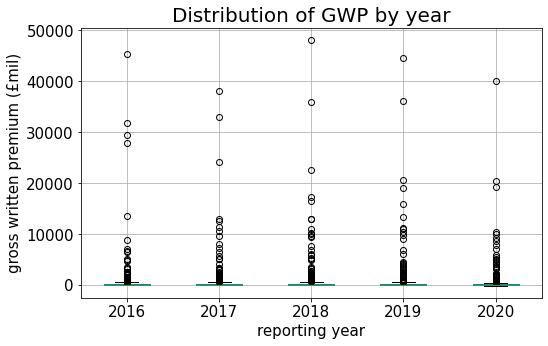

In [10]:
df[df.missreported != True][['reporting_period', 'gwp']].boxplot(by = 'reporting_period', figsize = (8,5))
plt.title('Distribution of GWP by year', size = 20)
plt.xlabel('reporting year', size = 15)
plt.ylabel('gross written premium (£mil)', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')

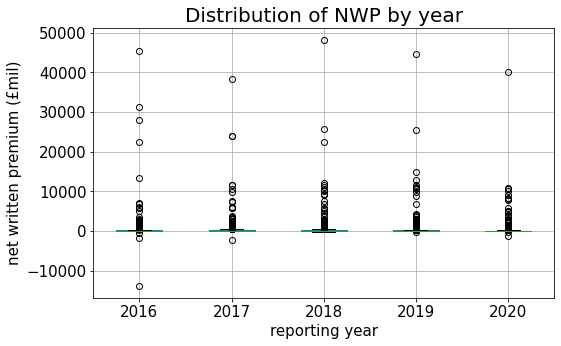

In [11]:
df[df.missreported != True][['reporting_period', 'nwp']].boxplot(by = 'reporting_period', figsize = (8,5))
plt.title('Distribution of NWP by year', size = 20)
plt.xlabel('reporting year', size = 15)
plt.ylabel('net written premium (£mil)', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')
plt.savefig('out/nwp_dis.png')

Text(0.5, 0.98, '')

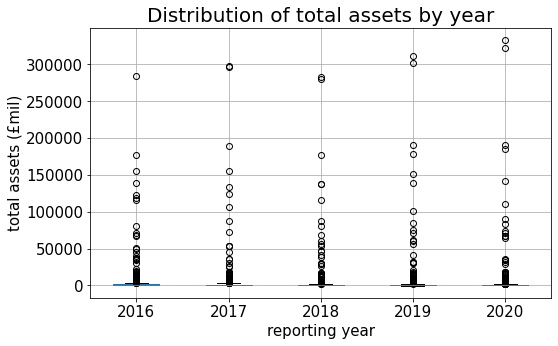

In [12]:
df[df.missreported != True][['reporting_period', 'total_assets']].boxplot(by = 'reporting_period', figsize = (8,5))
plt.title('Distribution of total assets by year', size = 20)
plt.xlabel('reporting year', size = 15)
plt.ylabel('total assets (£mil)', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')

Text(0.5, 0.98, '')

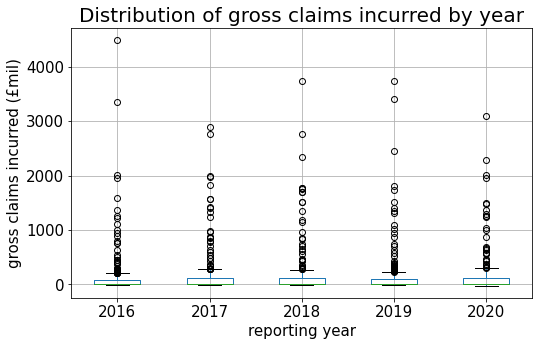

In [13]:
df[df.missreported != True][['reporting_period', 'gross_claims_incurred']].boxplot(by = 'reporting_period', figsize = (8,5))
plt.title('Distribution of gross claims incurred by year', size = 20)
plt.xlabel('reporting year', size = 15)
plt.ylabel('gross claims incurred (£mil)', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')

In [14]:
sum_stat_table(df_mean, ['gwp',
                         'nwp',
                         'total_assets',
                         'gross_claims_incurred']).to_excel('out/firm_size_sumstats.xlsx',
                                                            index = False)

pd.concat([sd_outliers(df_mean, 'gwp', 3, '>'),
           sd_outliers(df_mean,'nwp', 3, '>'),
           sd_outliers(df_mean,'total_assets', 3, '>'),
           sd_outliers(df_mean,'gross_claims_incurred', 3, '>')], axis = 1).to_excel('out/firm_size_outliers.xlsx',
                                                                       index = False)


## Changing business profile

Text(0.5, 0.98, '')

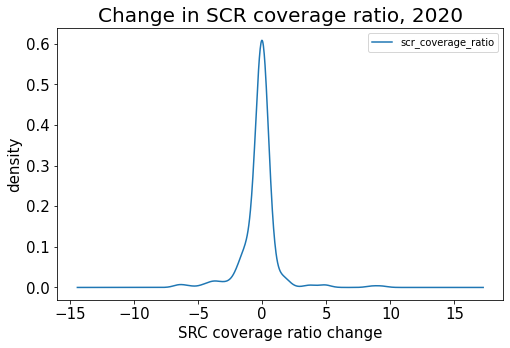

In [15]:
#exclude problem observations
df_c_2020[(df_c_2020['scr_coverage_ratio'] > -10) & (df_c_2020['scr_coverage_ratio'] < 10)][['scr_coverage_ratio']].plot.density(figsize = (8,5))
plt.title('Change in SCR coverage ratio, 2020', size = 20)
plt.xlabel('SRC coverage ratio change', size = 15)
plt.ylabel('density', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')

Text(0.5, 0.98, '')

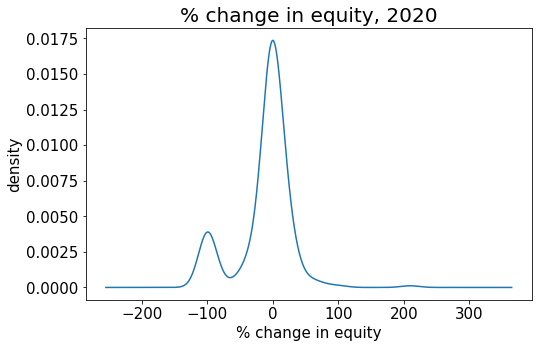

In [16]:
#exclude problem observations
df_c_2020[(~df_c_2020.equity.isna()) &
          (df_c_2020.equity >= -100) &
          (df_c_2020.equity < 400)]['equity'].plot.density(figsize = (8,5))
plt.title('% change in equity, 2020', size = 20)
plt.xlabel('% change in equity', size = 15)
plt.ylabel('density', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')

Text(0.5, 0.98, '')

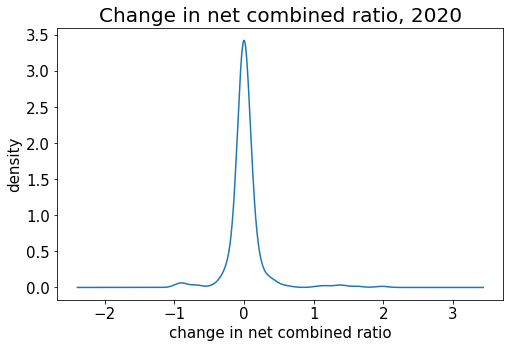

In [17]:
#exclude problem observations
df_c_2020[(df_c_2020.net_combined_ratio >= -1) &
          (df_c_2020.net_combined_ratio < 2)]['net_combined_ratio'].plot.density(figsize = (8,5))
plt.title('Change in net combined ratio, 2020', size = 20)
plt.xlabel('change in net combined ratio', size = 15)
plt.ylabel('density', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')

Text(0.5, 0.98, '')

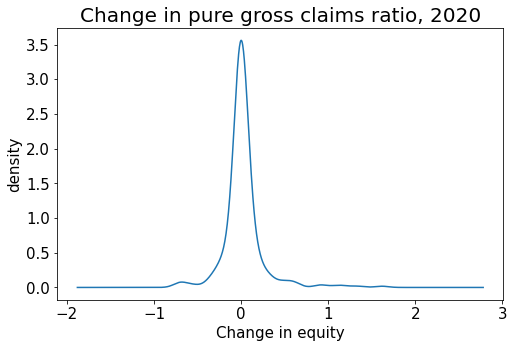

In [18]:
#exclude problem observations
df_c_2020[(df_c_2020.pure_gross_claims_ratio >= -1) &
          (df_c_2020.pure_gross_claims_ratio < 2)]['pure_gross_claims_ratio'].plot.density(figsize = (8,5))
plt.title('Change in pure gross claims ratio, 2020', size = 20)
plt.xlabel('Change in equity', size = 15)
plt.ylabel('density', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('')

In [19]:
# save summary stats

sum_stat_table(df_c_2020, ['scr_coverage_ratio',
                         'equity', # for this one just look at -100%
                         'net_combined_ratio',
                         'pure_gross_claims_ratio']).to_excel('out/changing_firm_sumstats.xlsx',
                                                            index = False)


#this needs to be made directional

pd.concat([sd_outliers(df_c_2020, 'scr_coverage_ratio', 3, '<'),
           sd_outliers(df_c_2020,'net_combined_ratio', 3, '>'),
           sd_outliers(df_c_2020,'pure_gross_claims_ratio', 3, '>')], axis = 1).to_excel('out/changing_firm_outliers.xlsx',
                                                                       index = False)

In [27]:
#equity outliers

df_c_2020[df_c_2020.equity == -100][['firm']].to_excel('out/outlier_equity_change.xlsx')

 ## Outliers from norm

Use previous method for outlier detection, except on all variables and in each reporting period separately. I then aggregate the total number of variables for which a firm is an outlier and call this their 'total' or 'outlier score'

In [20]:
for year in [2016,2017,2018,2019,2020]:
    
    x = pd.DataFrame(columns = ['firm'])
    
    for column in df.columns[2:]:
        
        mean = df[(df.missreported != True)][column].mean()
        
        sd = df[(df.missreported != True)][column].std()
        
        a = df[(df.missreported != True) & (df.reporting_period == year) &
               ((df[column] > (mean + 3 * sd)) | (df[column] < (mean - 3 * sd)))][['firm']]

        a[column] = 1
        
        x = pd.merge(x, a, on = 'firm', how = 'outer')
    
    x['total'] = x[x.columns[1:]].sum(axis = 1)
    
    x = x.sort_values('total', ascending = False)
    
    x.to_excel(f'out/outlier_from_norm_{year}.xlsx', index = False)
    
#double check why ratios don't show any outliers

## TASK II

Isolation forests give an 'outlier' score which can be used to rank the 'outlierness' of firms, and thus compare the first ten with my previous methods.

In [21]:
#fit isolation forest model for each reporting period

def fit_and_save_isolation_forest():
    '''
    Fit isolation forest on all features and save.
    '''
    
    cols = list(df.columns)
    cols.remove('missreported')
    cols.remove('firm')
    cols.remove('reporting_period')
    cols

    for year in [2016,2017,2018,2019,2020]:

        train = df[(df.missreported != True) & (df.reporting_period == year)][cols]

        model = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.05),random_state=42) #expect 5 percent to be outliers

        model.fit(train)

        table = df[(df.missreported != True) & (df.reporting_period == year)][['firm']]

        table['scores'] = model.decision_function(train)

        table['anomaly_score'] = model.predict(train)

        table = table.sort_values('scores')

        table.to_excel(f'out/isolation_outliers_{year}.xlsx', index = False)

fit_and_save_isolation_forest()

C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Isolatio

dbscan outlier detection. I parametrise dbscan so that it finds as close to 15 outliers as possible. I do this by fitting through different possible eps values (keeping min_samples constant).

In [22]:

def dbscan_outlier_search():
    
    cols = list(df.columns)
    cols.remove('missreported')
    cols.remove('firm')
    cols.remove('reporting_period')
    cols
    
    for year in [2016,2017,2018,2019,2020]:
        
        outliers = []
        
        train = df[(df.missreported != True) & (df.reporting_period == year)][cols]
        train = StandardScaler().fit_transform(train) #normalise data
        
        for dist in np.arange(0.1, 20, 0.1):

            db = DBSCAN(eps=dist, min_samples=5).fit(train) #outlier if there are less than 5 'similar' firms

            print()

            outliers.append(abs((len(pd.Series(db.labels_)[pd.Series(db.labels_ == -1)])) - 15)) #i want 15 outliers

        db = DBSCAN(eps=optimal_eps, min_samples=5).fit(train)

        table = df[(df.missreported != True) & (df.reporting_period == year)][['firm']]

        table['db_group'] = db.labels_
        
        table[table['db_group'] == -1].to_excel(f'out/dbscan_outlier_{year}.xlsx')

dbscan_outlier_search()

NameError: name 'optimal_eps' is not defined